<a href="https://colab.research.google.com/github/hatkaran/Zomato_Analysis/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How to read data from databse !

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
con = sqlite3.connect(r"/content/drive/MyDrive/Req. Zomato Data/zomato_rawdata.sqlite")
# con is connection to my sql database

In [7]:
query = "SELECT * FROM Users"

pd.read_sql_query(query, con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [8]:
df = pd.read_sql_query(query, con)

In [9]:
df.shape

(51717, 18)

In [10]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### How to deal with missing values?

In [11]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [12]:
df.shape

(51717, 18)

In [13]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [14]:
df.isnull().sum()/len(df) * 100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [15]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df["rate"].replace(("NEW","-"),np.nan,inplace = True)

In [17]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
"4.1/5".split("/")[0]

'4.1'

In [19]:
type("4.1/5".split("/")[0])

str

In [20]:
float("4.1/5".split("/")[0])

4.1

In [21]:
type(df["rate"][51713])

NoneType

In [22]:
df["rate"] = df["rate"].apply(lambda x: float(x.split("/")[0]) if type(x)==str else x)

# Missing Value is generally float in nature

In [23]:
df["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

### Is there a relation between online order option and rating of the restaurant?

###### Below is my own method

In [24]:
unique_val = df.rate.dropna().unique()

In [25]:
kk = df[(df["online_order"]=="Yes")].rate.value_counts().sort_values()
a = pd.DataFrame(kk.values,index = kk.index, columns = ["Yes"]).sort_index()
Y = a.reindex(unique_val,fill_value=0).sort_index()

In [26]:
Y

,Yes
1.8,0
2.0,0
2.1,15
2.2,16
2.3,22
2.4,34
2.5,63
2.6,177
2.7,166
2.8,376


In [27]:
rr = df[(df.rate.isnull()==False) & (df["online_order"]=="No")].rate.value_counts().sort_values()
b = pd.DataFrame(rr.values,index = rr.index, columns = ["No"]).sort_index()
N = b.reindex(unique_val,fill_value=0).sort_index()

In [28]:
N

,No
1.8,5
2.0,11
2.1,9
2.2,10
2.3,29
2.4,36
2.5,38
2.6,83
2.7,141
2.8,224


In [29]:
Final = N.join(Y,how="inner")
Final

,No,Yes
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166
2.8,224,376


<Axes: >

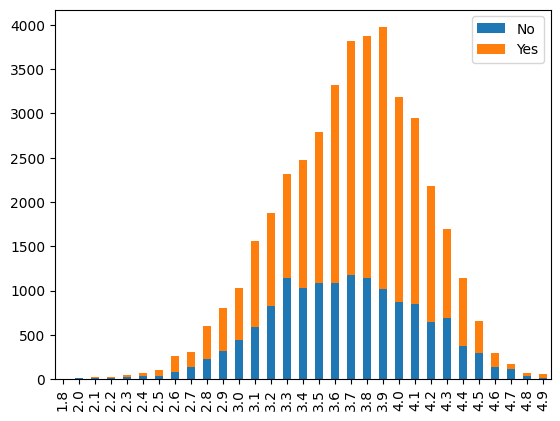

In [30]:
Final.plot(kind = "bar",stacked = True)

###### Another way

In [31]:
x = pd.crosstab(df["rate"],df["online_order"])
x #---> this is pivot table

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

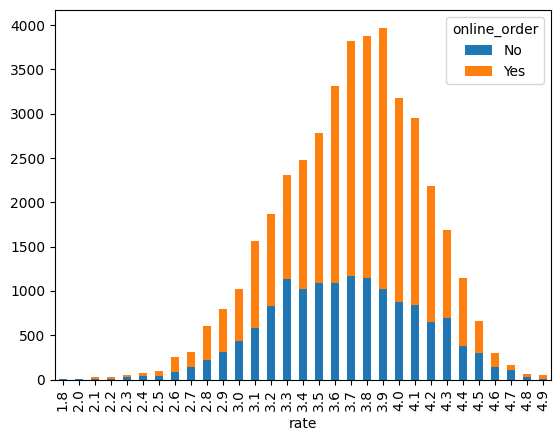

In [32]:
x.plot(kind="bar",stacked=True)

In [33]:
x.sum(axis = 1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [34]:
normalize_df = x.div(x.sum(axis = 1).astype(float), axis = 0)

<Axes: xlabel='rate'>

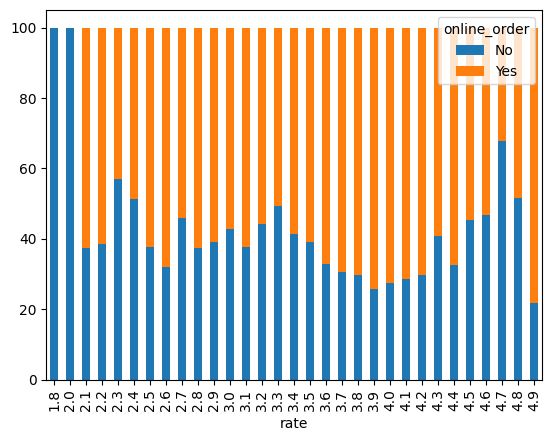

In [35]:
(normalize_df*100).plot(kind="bar",stacked=True)

In [36]:
# yes or no is about if a restaurant accepts online orders or not!

### Data Cleaning to perform Text Analysis

In [37]:
df["rest_type"].isnull().sum()

227

In [38]:
data = df.dropna(subset = "rest_type")

In [39]:
data["rest_type"].isnull().sum()

0

In [40]:
data["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [41]:
quick_bites_df = data[data["rest_type"].str.contains("Quick Bites")]

In [42]:
quick_bites_df.shape

(20639, 18)

In [43]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [44]:
quick_bites_df["reviews_list"]

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [45]:
quick_bites_df["reviews_list"] = quick_bites_df["reviews_list"].apply(lambda x:x.lower())

<ipython-input-45-44794182a825>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df["reviews_list"] = quick_bites_df["reviews_list"].apply(lambda x:x.lower())


In [46]:
from nltk.corpus import RegexpTokenizer
# nltk = natural language toolkit
# RegexpTokenizer = Regular expression tokenizer

In [47]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [48]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [49]:
tokenizer.tokenize(quick_bites_df["reviews_list"][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [50]:
reviews_tok = quick_bites_df["reviews_list"].apply(tokenizer.tokenize)

In [51]:
reviews_tok

3        [rated, rated, n, great, food, and, proper, ka...
23       [rated, rated, n, so, went, here, with, friend...
26       [rated, rated, n, please, provide, some, extra...
31       [rated, rated, n, worst, restaurant, ever, veg...
34       [rated, rated, n, not, worth, for, the, money,...
                               ...                        
51641    [rated, rated, n, food, is, not, upto, the, ma...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [rated, rated, n, i, was, randomly, looking, o...
Name: reviews_list, Length: 20639, dtype: object

In [52]:
reviews_tokens = data["reviews_list"].apply(tokenizer.tokenize)

In [53]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
51712    [Rated, RATED, n, Food, and, service, are, inc...
51713                                                   []
51714                                                   []
51715    [Rated, RATED, n, Nice, and, friendly, place, ...
51716    [Rated, RATED, n, Great, ambience, looking, ni...
Name: reviews_list, Length: 51490, dtype: object

### Perform Unigram analysis & removal of stopwords

In [54]:
import nltk

In [55]:
nltk.download("stopwords")

# NEXT TYM YE SAB KRNE KI JROORT NHI H, kyuki stopwords download ho gya hai ab

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
from nltk.corpus import stopwords

In [57]:
stop = stopwords.words("english")

In [58]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [59]:
stop.extend(["rated","n","nan","x","RATED","Rated"])

In [60]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [61]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
51712    [Rated, RATED, n, Food, and, service, are, inc...
51713                                                   []
51714                                                   []
51715    [Rated, RATED, n, Nice, and, friendly, place, ...
51716    [Rated, RATED, n, Great, ambience, looking, ni...
Name: reviews_list, Length: 51490, dtype: object

In [62]:
rev3 = reviews_tokens[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [63]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [64]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review: [token for token in each_review if token not in stop])

In [65]:
reviews_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
51712    [Food, service, incomparably, excellent, The, ...
51713                                                   []
51714                                                   []
51715    [Nice, friendly, place, staff, awesome, Ansur,...
51716    [Great, ambience, looking, nice, good, selecti...
Name: reviews_list, Length: 51490, dtype: object

In [66]:
type(reviews_tokens_clean)

pandas.core.series.Series

In [67]:
total_reviews_2D = list(reviews_tokens_clean)

In [68]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [69]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [70]:
from nltk import FreqDist

In [71]:
fd = FreqDist()

In [72]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1 # --> this syntax is taken from documentation(shift+tab) of FreqDist() function.

In [73]:
fd.most_common(20)

[('place', 958892),
 ('I', 906624),
 ('good', 870711),
 ('food', 800115),
 ('The', 667679),
 ('chicken', 313719),
 ('service', 273865),
 ('ordered', 261388),
 ('taste', 245081),
 ('great', 235933),
 ('really', 234390),
 ('try', 218724),
 ('ambience', 217874),
 ('time', 217257),
 ('one', 213594),
 ('It', 206382),
 ('also', 202443),
 ('like', 197463),
 ('We', 184449),
 ('visit', 183865)]

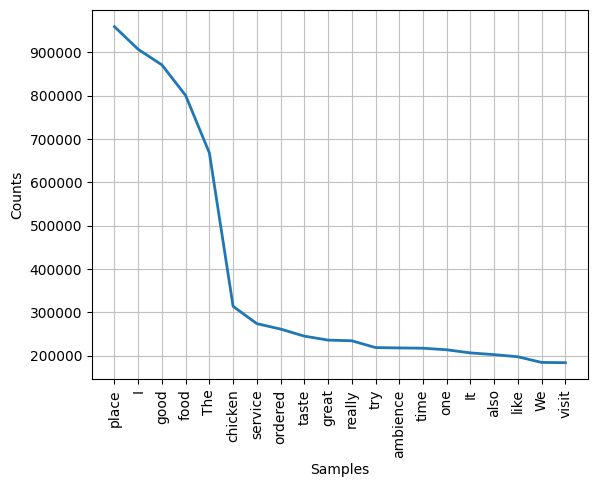

<Axes: xlabel='Samples', ylabel='Counts'>

In [74]:
fd.plot(20)

In [75]:
from collections import Counter

In [76]:
Counter(total_reviews_1D).most_common(20)

[('place', 958892),
 ('I', 906624),
 ('good', 870711),
 ('food', 800115),
 ('The', 667679),
 ('chicken', 313719),
 ('service', 273865),
 ('ordered', 261388),
 ('taste', 245081),
 ('great', 235933),
 ('really', 234390),
 ('try', 218724),
 ('ambience', 217874),
 ('time', 217257),
 ('one', 213594),
 ('It', 206382),
 ('also', 202443),
 ('like', 197463),
 ('We', 184449),
 ('visit', 183865)]

### Performing Bi-gram & Tri-gram analysis on data

In [77]:
from nltk import FreqDist, bigrams, trigrams

In [78]:
bi_grams = bigrams(total_reviews_1D)

In [79]:
bi_grams

<generator object bigrams at 0x7a13e3dbe7a0>

In [80]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [81]:
fd_bigrams.most_common(20)

[(('The', 'food'), 70551),
 (('really', 'good'), 64671),
 (('I', 'ordered'), 60088),
 (('This', 'place'), 54963),
 (('must', 'try'), 53865),
 (('We', 'ordered'), 52692),
 (('I', 'would'), 47294),
 (('visit', 'place'), 45409),
 (('The', 'place'), 43758),
 (('food', 'good'), 42791),
 (('good', 'food'), 42433),
 (('f', 'f'), 37330),
 (('good', 'place'), 36570),
 (('main', 'course'), 34713),
 (('The', 'ambience'), 33846),
 (('ice', 'cream'), 33429),
 (('also', 'good'), 32487),
 (('non', 'veg'), 32321),
 (('The', 'service'), 28278),
 (('I', 'tried'), 27983)]

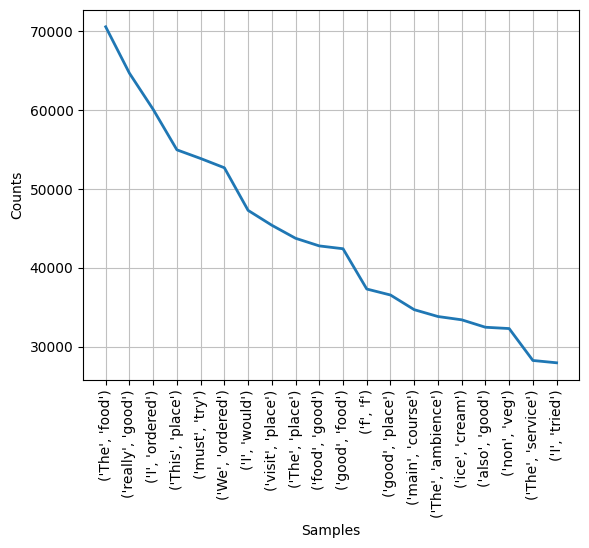

<Axes: xlabel='Samples', ylabel='Counts'>

In [82]:
fd_bigrams.plot(20)

In [83]:
fd_bigrams.most_common(100)

[(('The', 'food'), 70551),
 (('really', 'good'), 64671),
 (('I', 'ordered'), 60088),
 (('This', 'place'), 54963),
 (('must', 'try'), 53865),
 (('We', 'ordered'), 52692),
 (('I', 'would'), 47294),
 (('visit', 'place'), 45409),
 (('The', 'place'), 43758),
 (('food', 'good'), 42791),
 (('good', 'food'), 42433),
 (('f', 'f'), 37330),
 (('good', 'place'), 36570),
 (('main', 'course'), 34713),
 (('The', 'ambience'), 33846),
 (('ice', 'cream'), 33429),
 (('also', 'good'), 32487),
 (('non', 'veg'), 32321),
 (('The', 'service'), 28278),
 (('I', 'tried'), 27983),
 (('place', 'I'), 27535),
 (('good', 'The'), 26699),
 (('good', 'I'), 25415),
 (('food', 'I'), 25194),
 (('one', 'best'), 24631),
 (('nWe', 'ordered'), 24599),
 (('The', 'staff'), 23847),
 (('nice', 'place'), 23528),
 (('must', 'visit'), 23491),
 (('I', 'love'), 22794),
 (('time', 'I'), 21754),
 (('place', 'good'), 21720),
 (('I', 'loved'), 21398),
 (('place', 'hangout'), 21305),
 (('pretty', 'good'), 21033),
 (('I', 'like'), 20502),
 (

In [84]:
tri_grams = trigrams(total_reviews_1D)

In [85]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] += 1

In [86]:
fd_trigrams.most_common(50)

[(('f', 'f', 'f'), 19127),
 (('veg', 'non', 'veg'), 9254),
 (('The', 'food', 'good'), 9236),
 (('must', 'visit', 'place'), 9137),
 (('place', 'hangout', 'friends'), 8869),
 (('f', 'c', 'f'), 8001),
 (('xa', 'xa', 'xa'), 7959),
 (('I', 'must', 'say'), 7657),
 (('I', 'visited', 'place'), 7594),
 (('I', 'would', 'recommend'), 6478),
 (('nFood', 'nAmbience', 'nService'), 6236),
 (('I', 'would', 'say'), 5719),
 (('food', 'really', 'good'), 5624),
 (('A', 'good', 'place'), 5454),
 (('A', 'must', 'visit'), 5385),
 (('place', 'hang', 'friends'), 5366),
 (('c', 'f', 'f'), 4784),
 (('The', 'ambience', 'good'), 4665),
 (('North', 'Indian', 'food'), 4597),
 (('nFood', 'nService', 'nAmbience'), 4521),
 (('A', 'must', 'try'), 4381),
 (('f', 'f', 'c'), 4224),
 (('The', 'food', 'really'), 4125),
 (('I', 'would', 'like'), 4092),
 (('first', 'time', 'I'), 3965),
 (('I', 'would', 'definitely'), 3925),
 (('really', 'good', 'The'), 3862),
 (('The', 'service', 'good'), 3778),
 (('nService', 'nValue', 'money

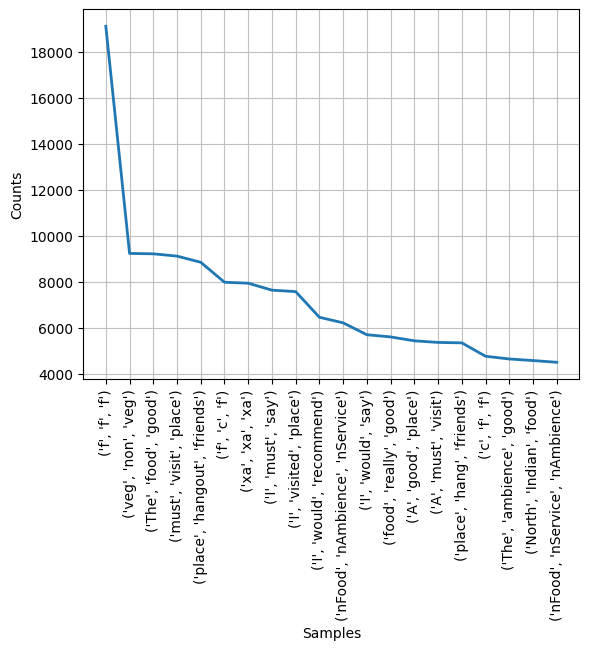

<Axes: xlabel='Samples', ylabel='Counts'>

In [87]:
fd_trigrams.plot(20)

### Extract geographical-coordinates from data

In [88]:
!pip install geocoder
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 2.1 MB/s eta 0:00:00


In [89]:
df["location"]

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [92]:
df["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [93]:
len(df["location"].unique())

94

In [94]:
df["location"] = df["location"] + " , Bangalore , Karnataka , India"

In [95]:
df["location"]

0             Banashankari , Bangalore , Karnataka , India
1             Banashankari , Bangalore , Karnataka , India
2             Banashankari , Bangalore , Karnataka , India
3             Banashankari , Bangalore , Karnataka , India
4             Basavanagudi , Bangalore , Karnataka , India
                               ...                        
51712           Whitefield , Bangalore , Karnataka , India
51713           Whitefield , Bangalore , Karnataka , India
51714           Whitefield , Bangalore , Karnataka , India
51715    ITPL Main Road, Whitefield , Bangalore , Karna...
51716    ITPL Main Road, Whitefield , Bangalore , Karna...
Name: location, Length: 51717, dtype: object

In [96]:
df["location"].unique()

array(['Banashankari , Bangalore , Karnataka , India',
       'Basavanagudi , Bangalore , Karnataka , India',
       'Mysore Road , Bangalore , Karnataka , India',
       'Jayanagar , Bangalore , Karnataka , India',
       'Kumaraswamy Layout , Bangalore , Karnataka , India',
       'Rajarajeshwari Nagar , Bangalore , Karnataka , India',
       'Vijay Nagar , Bangalore , Karnataka , India',
       'Uttarahalli , Bangalore , Karnataka , India',
       'JP Nagar , Bangalore , Karnataka , India',
       'South Bangalore , Bangalore , Karnataka , India',
       'City Market , Bangalore , Karnataka , India',
       'Nagarbhavi , Bangalore , Karnataka , India',
       'Bannerghatta Road , Bangalore , Karnataka , India',
       'BTM , Bangalore , Karnataka , India',
       'Kanakapura Road , Bangalore , Karnataka , India',
       'Bommanahalli , Bangalore , Karnataka , India', nan,
       'CV Raman Nagar , Bangalore , Karnataka , India',
       'Electronic City , Bangalore , Karnataka , India

In [97]:
df_copy = df.copy()

In [98]:
df_copy["location"].isnull().sum()

21

In [99]:
df_copy = df_copy.dropna(subset = ["location"])

In [100]:
df_copy["location"].isnull().sum()

0

In [101]:
locations = pd.DataFrame(df_copy["location"].unique())

In [102]:
locations.columns = ["Name"]

In [103]:
locations

,Name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , I..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


In [104]:
from geopy.geocoders import Nominatim

In [105]:
geolocator = Nominatim(user_agent="app", timeout=None)
# "app" is used to establish connection with Nominatim
# Just to avoid timeout error ...timeout =  None is done

In [106]:
lat = []
lon = []

for location in locations["Name"]:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [107]:
locations["latitude"] = lat
locations["longitude"] = lon

In [108]:
locations

,Name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915221,77.573598
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946703,77.530070
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road , Bangalore , Karnataka , India",12.975608,77.555356
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


### Let's build the geographhical Heat-Maps

In [109]:
locations.isnull().sum()

Name         0
latitude     2
longitude    2
dtype: int64

In [110]:
locations[locations["latitude"].isnull()]

,Name,latitude,longitude
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [111]:
from warnings import filterwarnings
filterwarnings("ignore")

In [112]:
locations.loc[45]

Name         St. Marks Road , Bangalore , Karnataka , India
latitude                                          12.974426
longitude                                         77.601539
Name: 45, dtype: object

In [113]:
locations["latitude"][79] = 13.0163
locations["longitude"][79] = 77.6785

locations["latitude"][85] = 13.0068
locations["longitude"][85] = 77.5813

In [114]:
locations.isnull().sum()

Name         0
latitude     0
longitude    0
dtype: int64

In [115]:
df["cuisines"]

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [116]:
df["cuisines"].str.contains("North Indian")

0         True
1         True
2        False
3         True
4         True
         ...  
51712    False
51713    False
51714    False
51715    False
51716     True
Name: cuisines, Length: 51717, dtype: object

In [117]:
df["cuisines"].str.contains("North Indian").isnull().sum()

45

In [118]:
df = df.dropna(subset = ["cuisines"])

In [119]:
north_india = df[df["cuisines"].str.contains("North Indian")]

In [120]:
north_india.shape

(21085, 18)

In [121]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [122]:
north_india["location"].value_counts()

BTM , Bangalore , Karnataka , India                  2469
HSR , Bangalore , Karnataka , India                  1123
Whitefield , Bangalore , Karnataka , India           1059
Marathahalli , Bangalore , Karnataka , India         1038
JP Nagar , Bangalore , Karnataka , India              958
                                                     ... 
Hebbal , Bangalore , Karnataka , India                  4
Jakkur , Bangalore , Karnataka , India                  3
Central Bangalore , Bangalore , Karnataka , India       2
West Bangalore , Bangalore , Karnataka , India          1
Peenya , Bangalore , Karnataka , India                  1
Name: location, Length: 90, dtype: int64

In [123]:
north_india_rest_count = north_india["location"].value_counts().reset_index().rename(columns = {"index":"Name","location":"Count"})

In [124]:
north_india_rest_count

,Name,Count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , India",2
88,"West Bangalore , Bangalore , Karnataka , India",1


In [125]:
heatmap_df = north_india_rest_count.merge(locations, on = "Name",how = "left")

In [126]:
heatmap_df

,Name,Count,latitude,longitude
0,"BTM , Bangalore , Karnataka , India",2469,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",1123,12.911623,77.638862
2,"Whitefield , Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.912076,77.579393
...,...,...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore , Karnataka , India",2,12.973037,77.538238
88,"West Bangalore , Bangalore , Karnataka , India",1,13.022235,77.567183


In [127]:
!pip install folium

In [128]:
import folium

In [129]:
basemap = folium.Map()

In [130]:
basemap

In [131]:
heatmap_df.columns

Index(['Name', 'Count', 'latitude', 'longitude'], dtype='object')

In [132]:
from folium.plugins import HeatMap

In [133]:
HeatMap(heatmap_df[['latitude', 'longitude', "Count"]]).add_to(basemap)

In [134]:
basemap

### How to automate your task : i.e. Perform Automation

In [135]:
def get_heatmap(cuisine):
    cuisine_df = df[df["cuisines"].str.contains(cuisine)]
    cuisine_rest_count = cuisine_df["location"].value_counts().reset_index().rename(columns = {"index":"Name","location":"Count"})
    heatmap_df = cuisine_rest_count.merge(locations, on = "Name",how = "left")
    print(heatmap_df.head(4))

    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude', "Count"]]).add_to(basemap)
    return basemap

In [136]:
get_heatmap("South Indian")

                                        Name  Count   latitude  longitude
0        BTM , Bangalore , Karnataka , India    815  12.911276  77.604565
1   JP Nagar , Bangalore , Karnataka , India    437  12.912076  77.579393
2        HSR , Bangalore , Karnataka , India    436  12.911623  77.638862
3  Jayanagar , Bangalore , Karnataka , India    416  12.929273  77.582423


In [137]:
df["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)